# 自作データセットの学習

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ

In [9]:
train_data_gen = \
train_image_generator.flow_from_directory(batch_size=batch_size,
                                          directory=train_dir,
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
sample_training_images, _ = next(train_data_gen)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

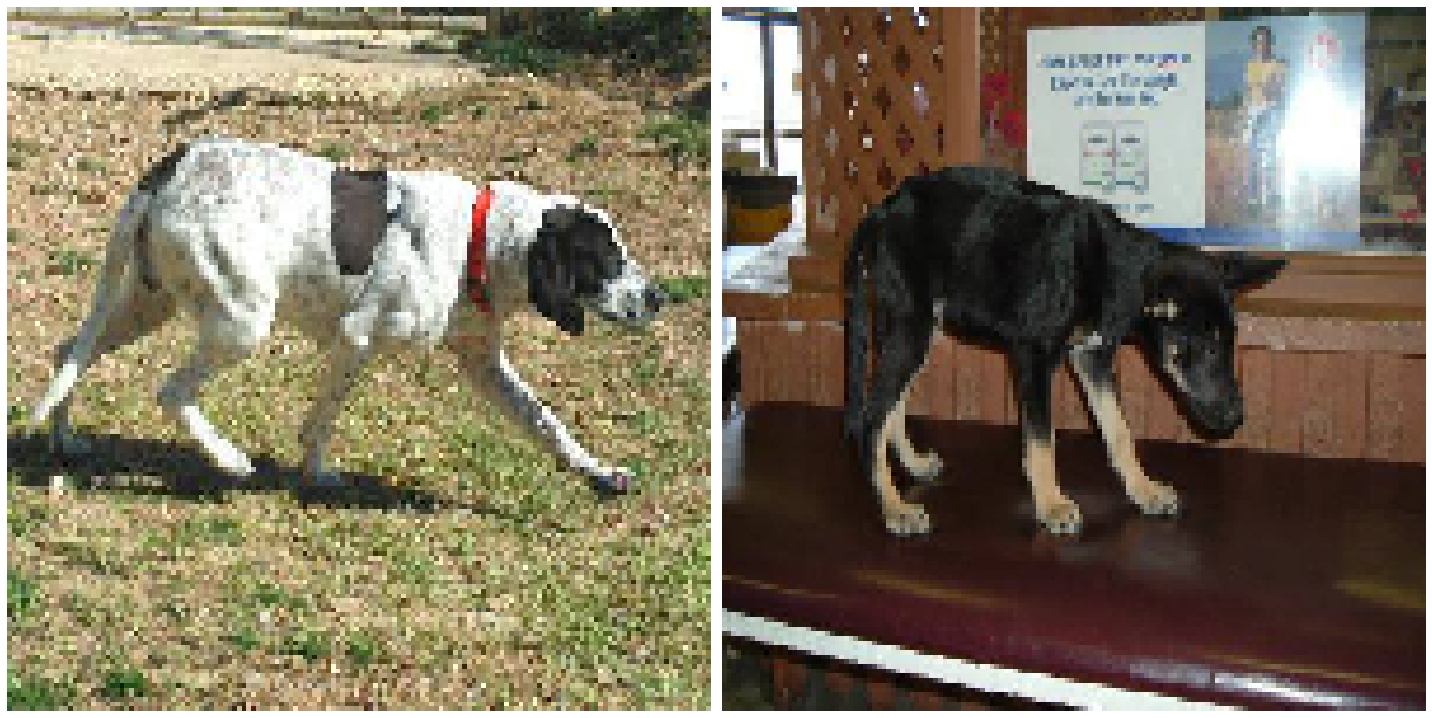

In [12]:
plotImages(sample_training_images[:2])

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [18]:
history = model.fit_generator(
    train_data_gen,
    #steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    #validation_data=val_data_gen,
    #validation_steps=total_val // batch_size
)

Epoch 1/15
1000/1000 [==============================] - 107s 107ms/step - loss: 0.7091 - acc: 0.5060
Epoch 2/15
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6923 - acc: 0.5440
Epoch 3/15
1000/1000 [==============================] - 118s 118ms/step - loss: 0.6870 - acc: 0.5750
Epoch 4/15
1000/1000 [==============================] - 120s 120ms/step - loss: 0.6588 - acc: 0.6110
Epoch 5/15
1000/1000 [==============================] - 119s 119ms/step - loss: 0.6111 - acc: 0.6670
Epoch 6/15
1000/1000 [==============================] - 119s 119ms/step - loss: 0.5289 - acc: 0.7270
Epoch 7/15
1000/1000 [==============================] - 120s 120ms/step - loss: 0.3943 - acc: 0.8120
Epoch 8/15
1000/1000 [==============================] - 119s 119ms/step - loss: 0.2524 - acc: 0.8935
Epoch 9/15
1000/1000 [==============================] - 114s 114ms/step - loss: 0.1448 - acc: 0.9440
Epoch 10/15
1000/1000 [==============================] - 118s 118ms/step - loss: 0.0975 - a

In [22]:
tf.__version__

'1.14.0'

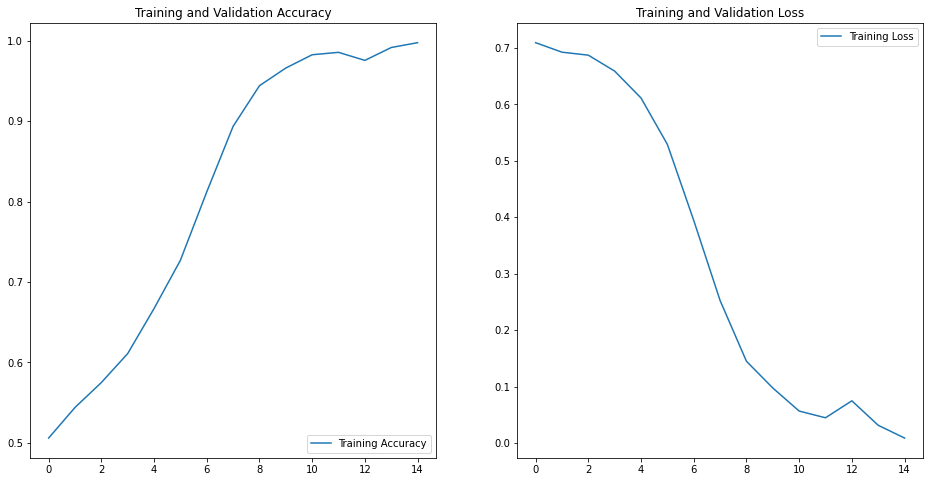

In [24]:
acc = history.history['acc']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0572 - acc: 0.9885 - val_loss: 2.3713 - val_acc: 0.6240
Epoch 2/15
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0230 - acc: 0.9945 - val_loss: 2.6621 - val_acc: 0.6080
Epoch 3/15
1000/1000 [==============================] - 103s 103ms/step - loss: 0.0636 - acc: 0.9830 - val_loss: 3.4332 - val_acc: 0.5950
Epoch 4/15
1000/1000 [==============================] - 114s 114ms/step - loss: 0.0321 - acc: 0.9885 - val_loss: 2.4295 - val_acc: 0.6160
Epoch 5/15
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0096 - acc: 0.9985 - val_loss: 3.2357 - val_acc: 0.6080
Epoch 6/15
1000/1000 [==============================] - 98s 98ms/step - loss: 0.0553 - acc: 0.9865 - val_loss: 2.8350 - val_acc: 0.5950
Epoch 7/15
1000/1000 [==============================] - 100s 100ms/step - loss: 0.0117 - acc: 0.9965 - val_loss: 3.2167 - val_acc: 0.6200
Epoch 8/15
1000/1000 [==============

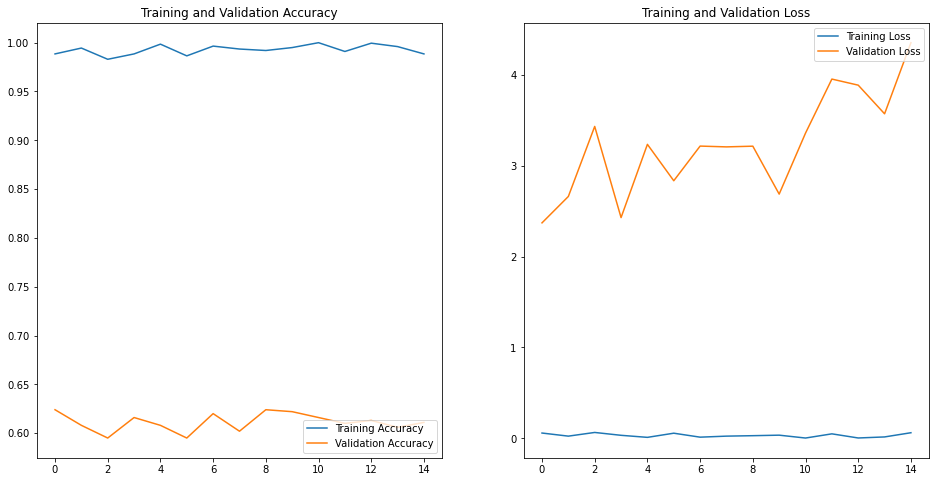

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

**《データ拡張のためのライブラリ》**

データ拡張にはalbumentationsなどがあります。

https://github.com/albu/albumentations

また、Kerasを使う場合はImageDataGeneratorも便利です。

https://keras.io/ja/preprocessing/image/


**《データ拡張の効果の調査》**

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

### 水平反転
`ImageDataGenerator` クラスの引数として `horizontal_flip` を渡し、 `True`を設定。

In [30]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [31]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [32]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

学習サンプルから1つのサンプル画像を取得する作業を5回繰り返して、おなじ画像に5回データ拡張が適用されるようにする。

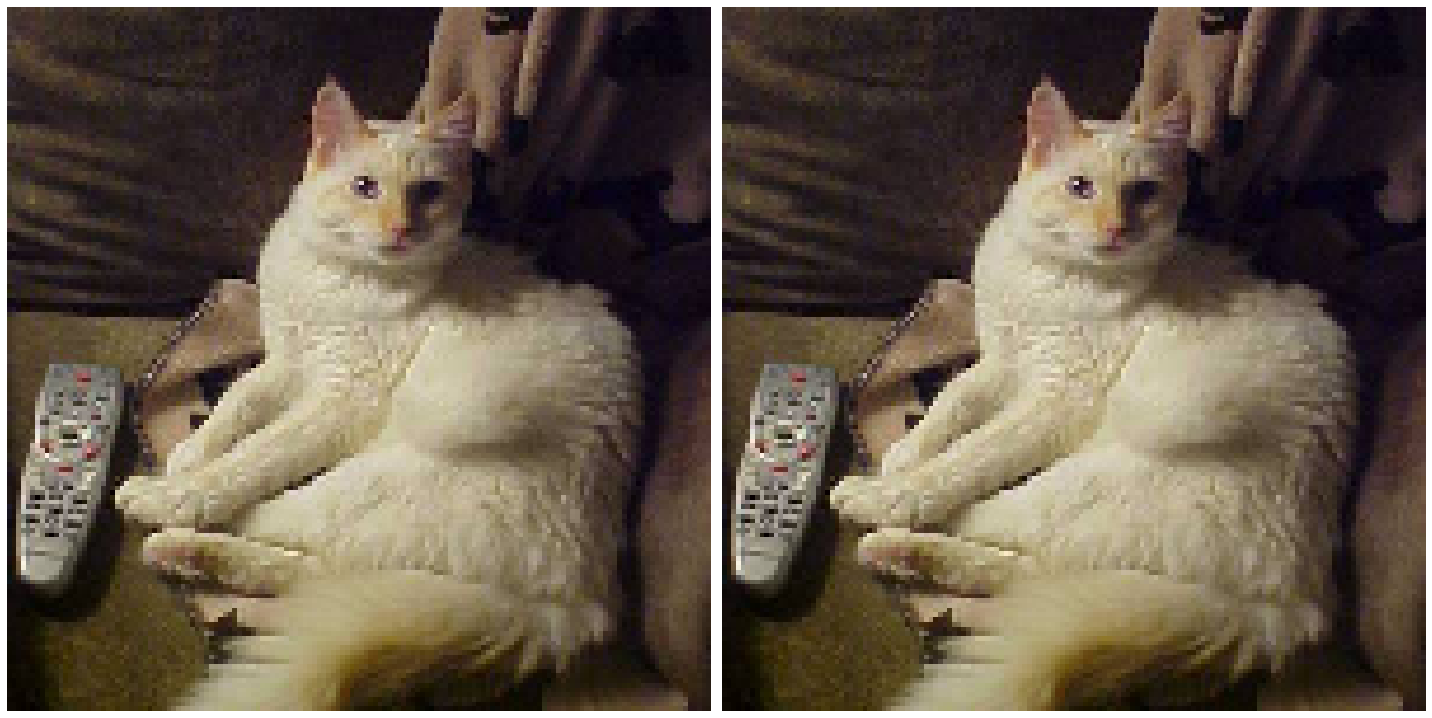

In [33]:
# 上で学習用画像の可視化のために定義、使用されたおなじカスタムプロット関数を再利用する
plotImages(augmented_images)

### ランダムな回転
回転のデータ拡張を利用して学習用サンプルをランダムに左右45度の範囲で回転させる。

In [34]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [35]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


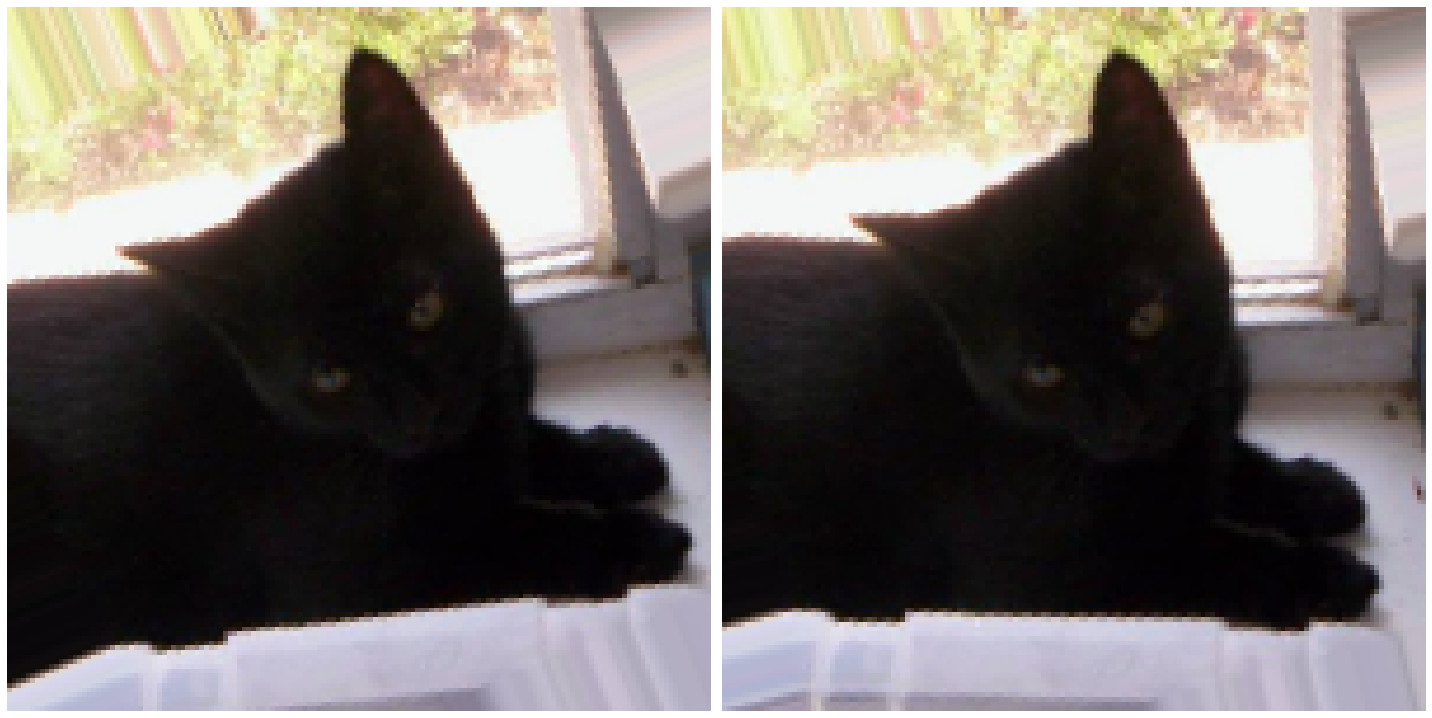

In [36]:
plotImages(augmented_images)

### ズームによるデータ拡張の適用
データセットにズームによるデータ拡張を適用して、画像をランダムに最大50％拡大します。

In [37]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [38]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


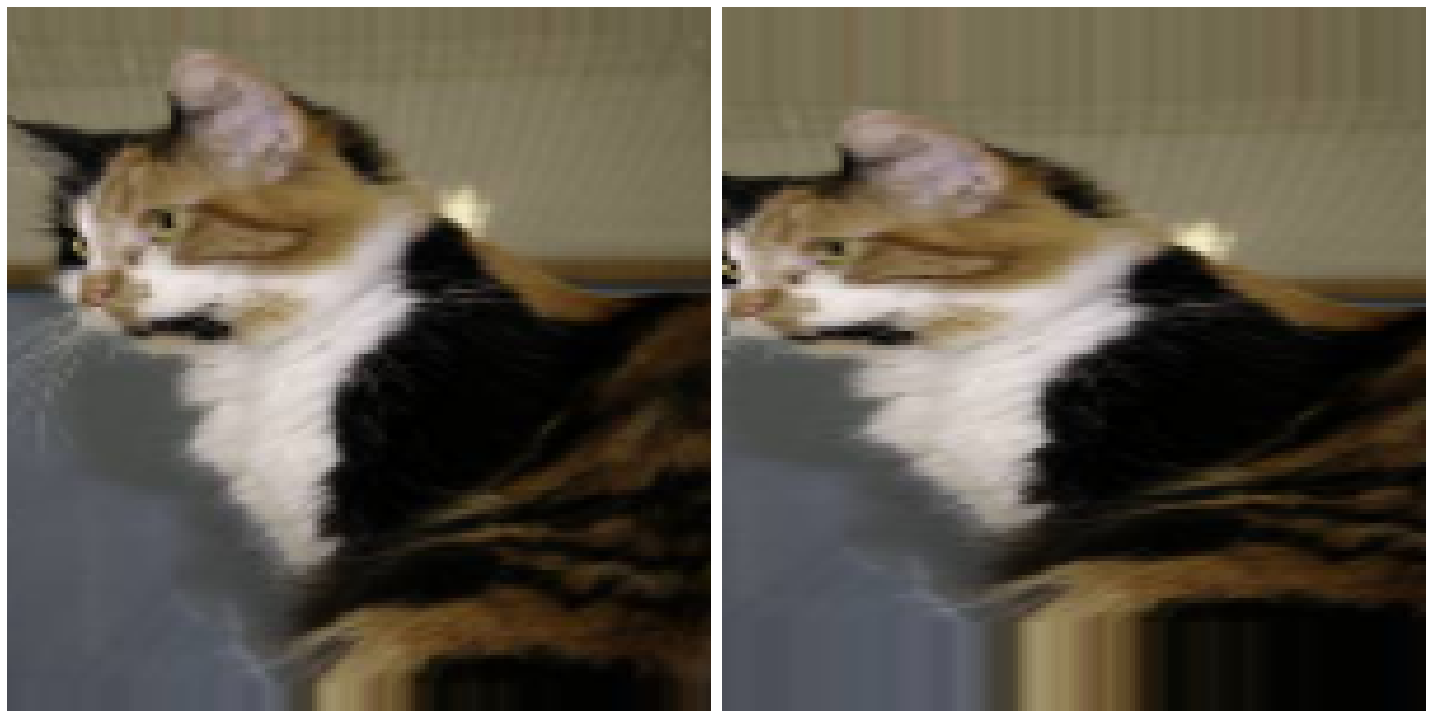

In [39]:
plotImages(augmented_images)

### すべてのデータ拡張を同時に利用する
ここまでで行ったすべてのデータ拡張機能を適用する。

ここでは、学習用画像に対して、リスケール、45度の回転、幅シフト、高さシフト、水平反転、ズームを適用する。

In [40]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [41]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


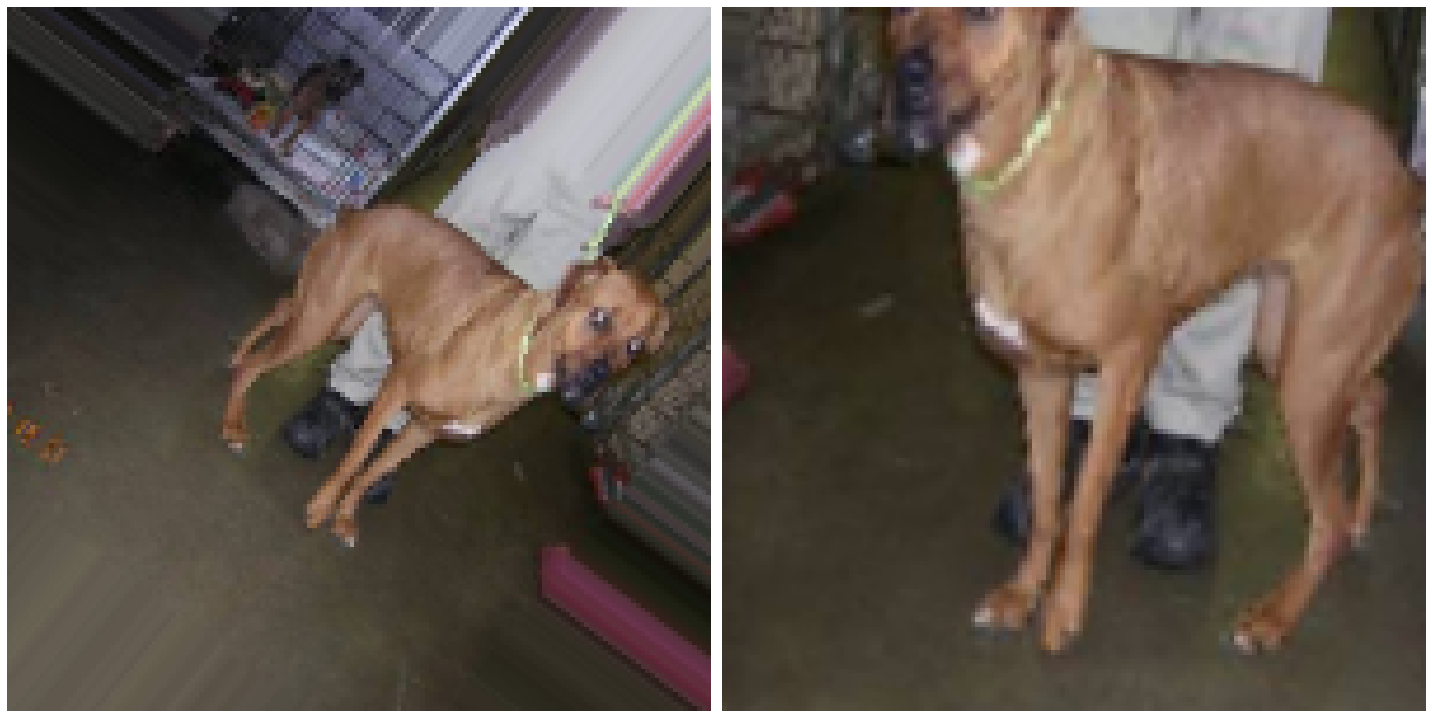

In [42]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

**《アノテーションのためのツール》**

アノテーションツールにはLabelImgなどがあります。

https://github.com/tzutalin/labelImg

〈LabelImgの使い方〉

https://search.ieice.org/bin/pdf_link.php?category=D&lang=J&year=2019&fname=j102-d_2_34&abst=



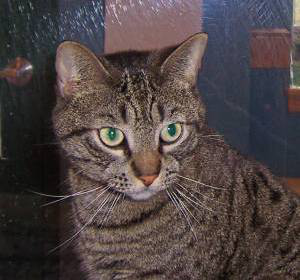

In [46]:
from PIL import Image

#jpgデータを読み込みます
img = Image.open('/Users/SHOTA/diveintocode-ml/dogs-vs-cats/train/cat.1.jpg')

In [51]:
!pip3 install pipenv

     |████████████████████████████████| 3.9 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 385 kB/s eta 0:00:01
     |████████████████████████████████| 335 kB 984 kB/s eta 0:00:01


In [53]:
!pipenv run pip install pyqt5==5.12.1 lxml

Creating a virtualenv for this project...
Pipfile: /Users/SHOTA/diveintocode-ml/Pipfile
Using /Users/SHOTA/.pyenv/versions/anaconda3-2020.02/bin/python3 (3.7.6) to create virtualenv...
⠋ Creating virtual environment...created virtual environment CPython3.7.6.final.0-64 in 691ms
  creator CPython3Posix(dest=/Users/SHOTA/.local/share/virtualenvs/diveintocode-ml-2pdqRieG, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/SHOTA/Library/Application Support/virtualenv)
    added seed packages: pip==20.3.3, setuptools==51.1.2, wheel==0.36.2
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator

✔ Successfully created virtual environment! 
Virtualenv location: /Users/SHOTA/.local/share/virtualenvs/diveintocode-ml-2pdqRieG
Creating a Pipfile for this project...
     |████████████████████████████████| 37.8 MB 907 kB/s eta 0:00:01     

In [58]:
! git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 1718 (delta 4), reused 12 (delta 3), pack-reused 1700
Receiving objects: 100% (1718/1718), 232.73 MiB | 201.00 KiB/s, done.
Resolving deltas: 100% (1020/1020), done.


In [60]:
import xml.etree.ElementTree as ET

#xmlデータを読み込みます
tree = ET.parse('/Users/SHOTA/diveintocode-ml/sprint18_dataset/train/cats/cat.0.xml')
#一番上の階層の要素を取り出します
root = tree.getroot()

In [61]:
print(root.tag)
print(root.attrib)

annotation
{}


In [65]:
for animal in root:
    print(animal.tag)
    print(animal.attrib)

folder
{}
filename
{}
path
{}
source
{}
size
{}
segmented
{}
object
{}


## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

〈PythonでのXMLファイル操作例〉

https://qiita.com/sino20023/items/0314438d397240e56576

〈参ドキュメント〉

https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

〈参考ノートブック〉

https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb

In [67]:
!pip install albumentations

In [68]:
import albumentations as A
import cv2
import random

In [69]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [95]:
image = cv2.imread('/Users/SHOTA/diveintocode-ml/sprint18_dataset/train/30784590_18b637124e_z.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [98]:
bboxes = [[40.66, 155.95, 147.09, 184.88], [466.7, 80.84, 132.8, 181.84]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}

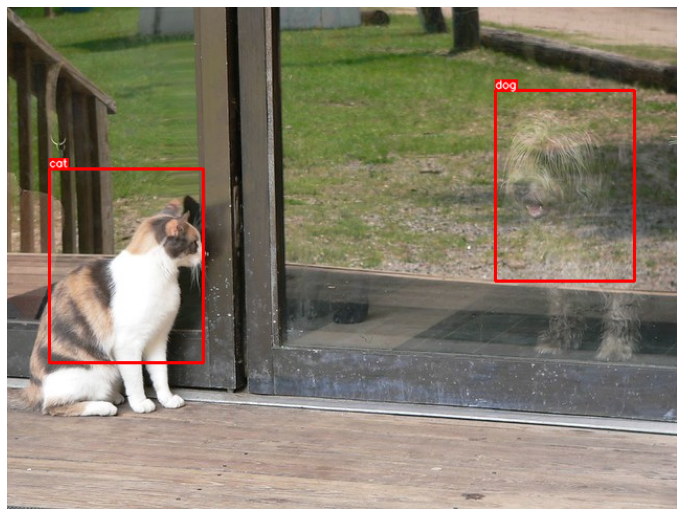

In [99]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [105]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

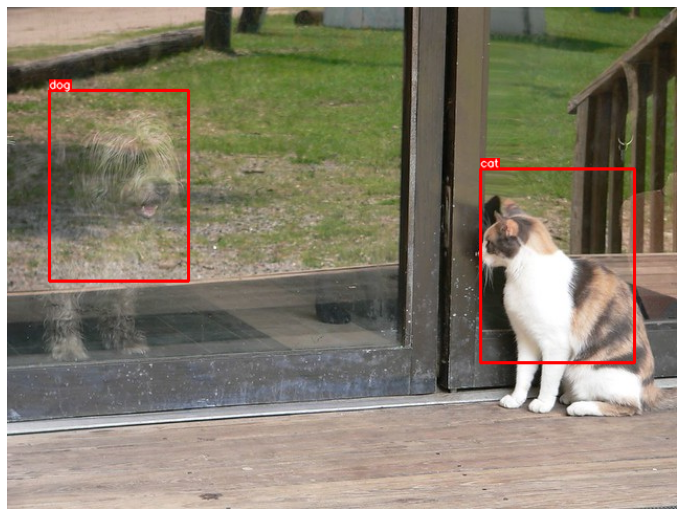

In [106]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)


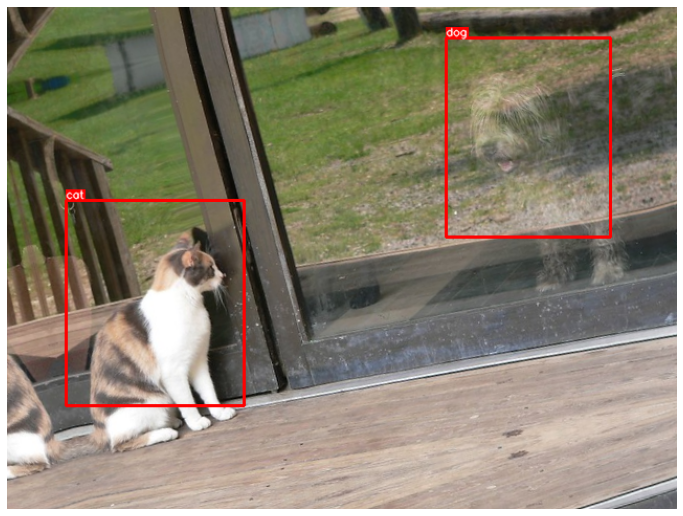

In [103]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)


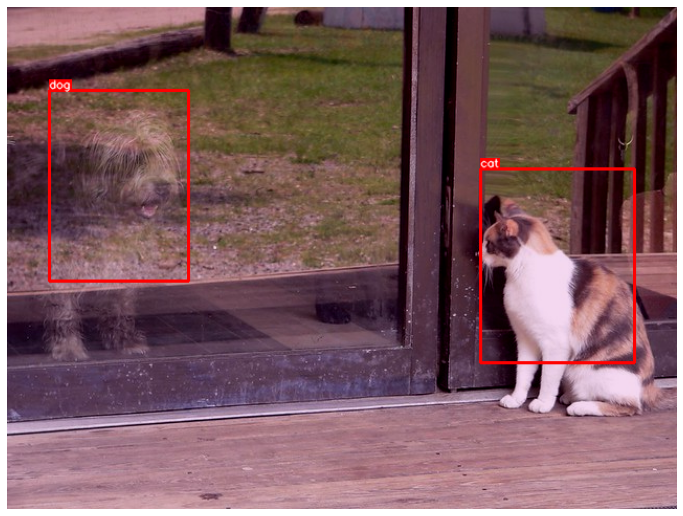

In [104]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

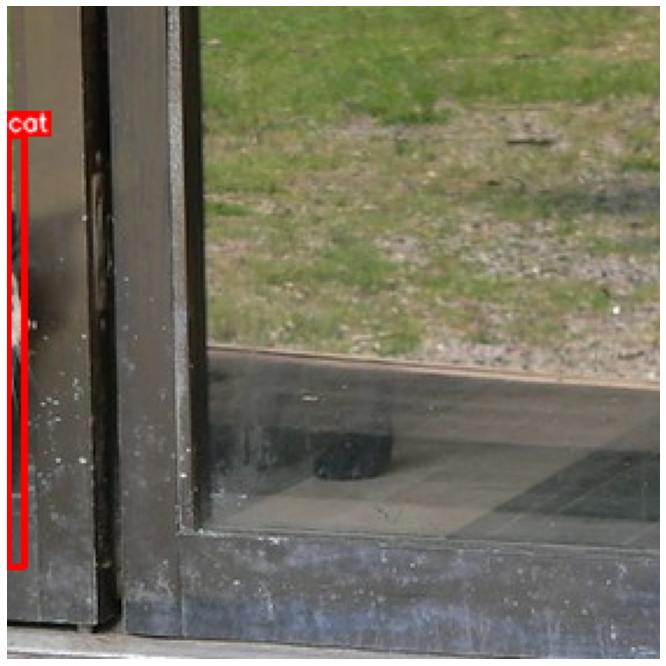

In [107]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)